<a href="https://www.kaggle.com/code/chulsey/renewableenergy-eda?scriptVersionId=191589529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-renewable-energy-and-indicators-dataset/complete_renewable_energy_dataset.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Import data and examine
df = pd.read_csv('../input/global-renewable-energy-and-indicators-dataset/complete_renewable_energy_dataset.csv')
df.shape

(2500, 56)

In [4]:
df.head(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
5,India,2014,Wind,90483.647159,28526.816414,9.359774e+09,796046057,1.201087e+13,363527.697802,81737.600051,...,55.926163,87.388316,91.739835,915,52,1684,602517,8.960624,1,1
6,Germany,2014,Wind,5656.905990,20658.704725,7.703454e+09,926881425,1.104805e+14,997437.335661,95825.292114,...,40.331971,54.155262,55.122029,419,67,895,188545,63.049554,0,0
7,Germany,2016,Biomass,63308.327773,47740.699694,2.808873e+09,518729600,2.711192e+13,228249.133711,28094.829702,...,26.979923,94.815418,31.329946,187,72,8925,735675,66.661707,0,1
8,Japan,2015,Biomass,70560.471062,37648.718972,9.095394e+09,104974272,6.088617e+13,121449.836113,61009.674375,...,69.941386,23.780183,71.286609,995,34,1287,707187,59.375231,1,0
9,Canada,2002,Wind,57780.099746,22408.241922,2.810624e+09,1304327983,7.979335e+13,364330.103993,32170.718271,...,76.109494,4.616307,52.150742,775,51,2919,573988,55.018123,1,0


In [5]:
df.isna().sum()

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

In [6]:
df.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


In [7]:
df['Country'].unique()

array(['USA', 'Australia', 'Canada', 'Japan', 'China', 'India', 'Germany',
       'France', 'Brazil', 'Russia'], dtype=object)

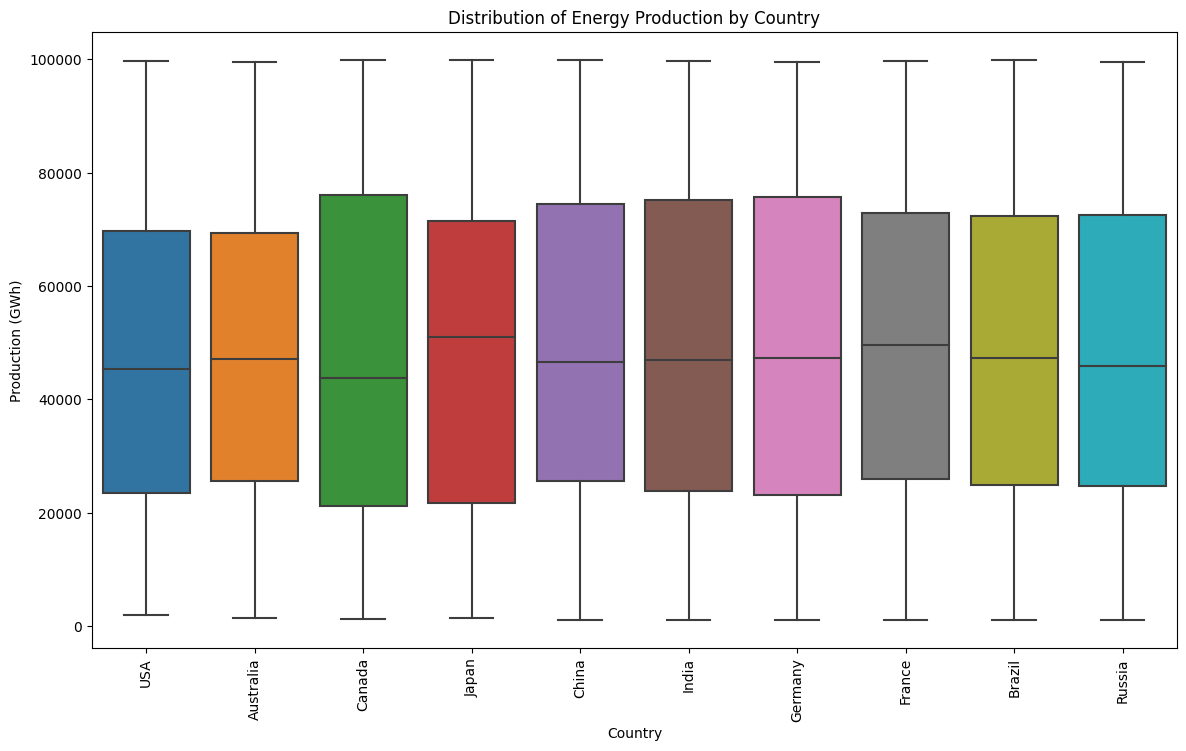

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='Production (GWh)')
plt.title('Distribution of Energy Production by Country')
plt.xticks(rotation=90)
plt.ylabel('Production (GWh)')
plt.show()

Further breakdown of energy production by energy type for each country.

In [9]:
#energy_order = ['Solar', 'Wind', 'Hydro', 'Biomass', 'Geothermal']
energy_order = df['Energy Type'].unique().tolist()
energy_order

['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']

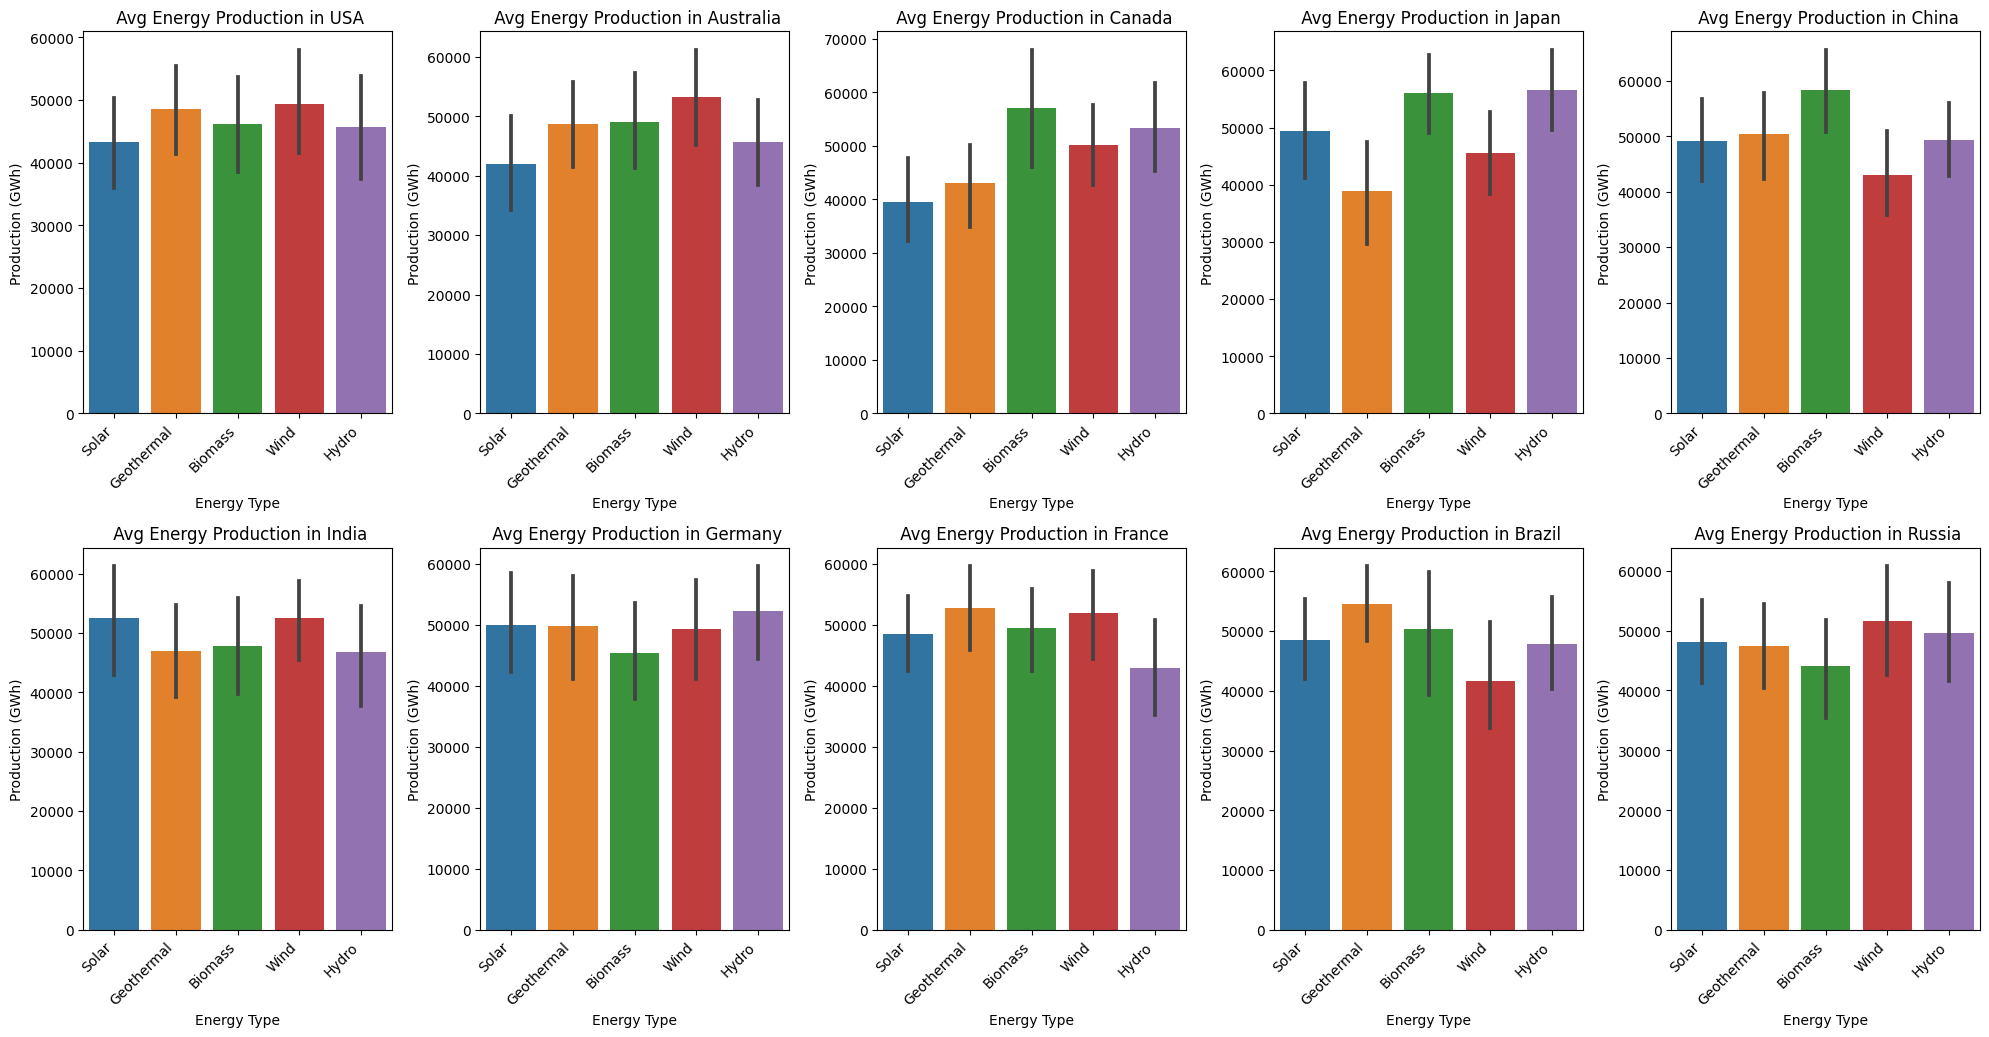

In [10]:
# Get unique countries and set up the subplot grid
countries = df['Country'].unique()
num_countries = len(countries)
#fig, axes = plt.subplots(nrows=(num_countries + 2) // 3, ncols=3, figsize=(15, 5 * ((num_countries + 2) // 3)))
fig, axes = plt.subplots(nrows= num_countries // 2, ncols=5, figsize=(20, 5 * (num_countries // 2)))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot for each country
for i, country in enumerate(countries):
    ax = axes[i]
    df_country = df[df['Country'] == country]
    sns.barplot(x='Energy Type', y='Production (GWh)', data=df_country, order=energy_order, ax=ax)
    ax.set_title(f' Avg Energy Production in {country}')
    ax.set_xlabel('Energy Type')
    ax.set_ylabel('Production (GWh)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

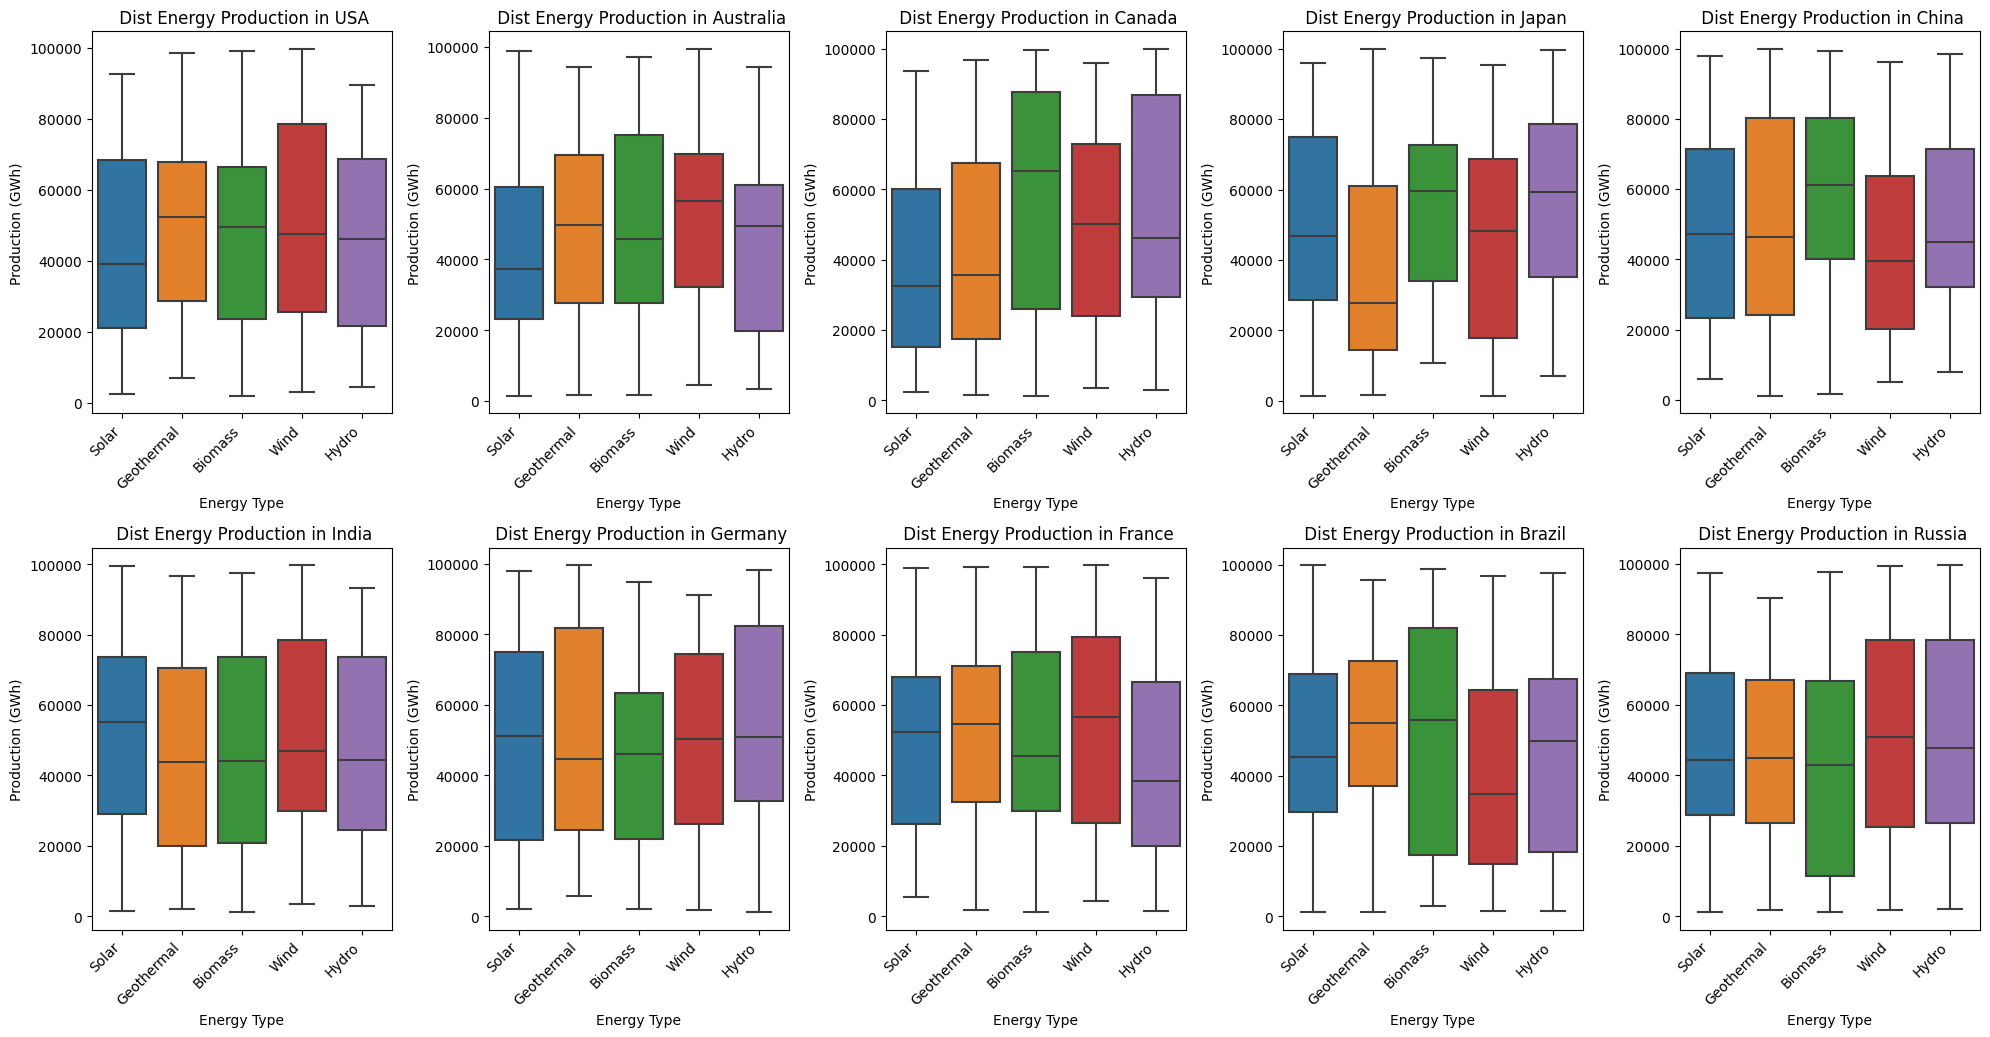

In [11]:
#fig, axes = plt.subplots(nrows=(num_countries + 2) // 3, ncols=3, figsize=(15, 5 * ((num_countries + 2) // 3)))
fig, axes = plt.subplots(nrows= num_countries // 2, ncols=5, figsize=(20, 5 * (num_countries // 2)))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot for each country
for i, country in enumerate(countries):
    ax = axes[i]
    df_country = df[df['Country'] == country]
    sns.boxplot(x='Energy Type', y='Production (GWh)', data=df_country, order=energy_order, ax=ax)
    ax.set_title(f' Dist Energy Production in {country}')
    ax.set_xlabel('Energy Type')
    ax.set_ylabel('Production (GWh)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The following figure illustrates the average investment (USD) per country. (@lightonkalumba) 

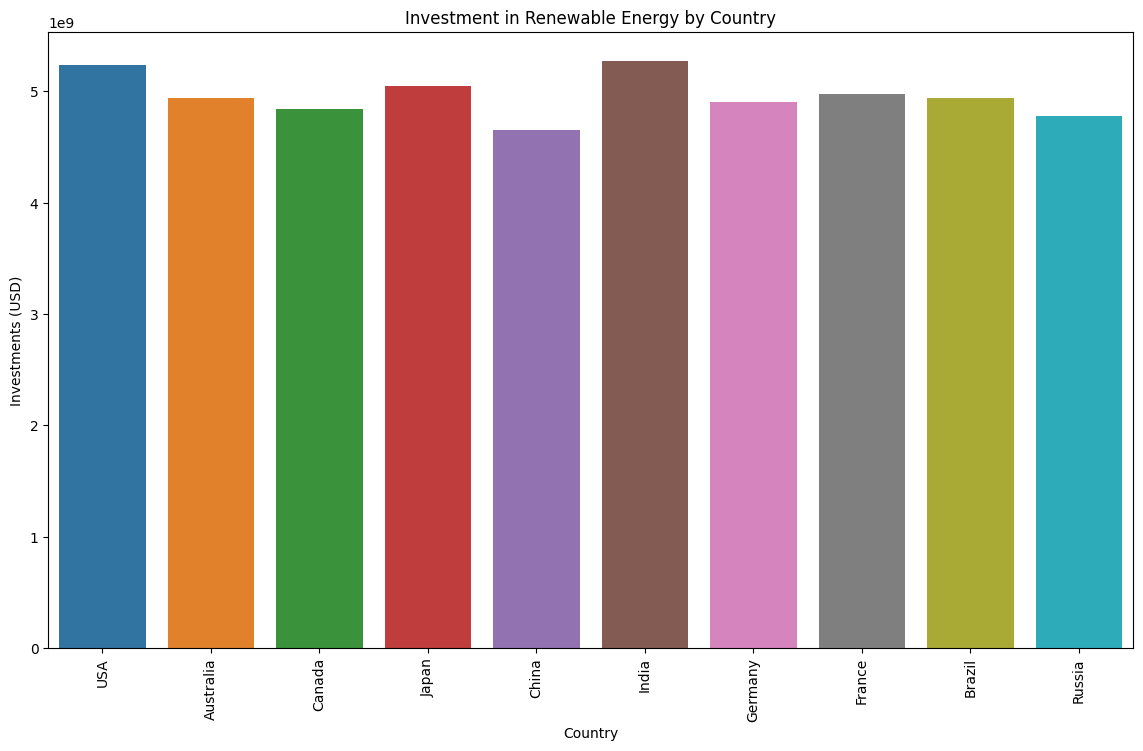

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Country', y='Investments (USD)', errorbar=None)
plt.title('Investment in Renewable Energy by Country')
plt.xticks(rotation=90)
plt.ylabel('Investments (USD)')
plt.show()

# Correlation analysis for USA data

Compare production and energy consumption.

In [13]:
df_USA = df.loc[df.Country == 'USA']
df_USA.head(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
31,USA,2005,Wind,55487.022414,13187.616682,4.972808e+09,710170825,1.160719e+14,985035.710103,48007.275199,...,73.190026,27.681272,60.332998,220,95,9622,442797,57.057514,0,0
39,USA,2006,Hydro,21195.906636,34520.490610,9.333387e+09,51710882,2.802626e+13,82210.082536,49193.291240,...,85.752072,22.331396,83.063427,943,26,2979,569529,3.682494,1,0
52,USA,2014,Wind,10964.768790,18139.559117,1.066271e+09,1292204876,1.846752e+13,267626.780686,64471.760741,...,94.428391,73.100577,61.907810,221,54,9303,81664,44.765644,0,1
57,USA,2016,Hydro,71690.955005,45631.258916,6.479176e+09,643635950,6.848907e+12,564800.075362,55904.692161,...,91.894775,5.908946,10.367295,177,55,2382,294639,27.354661,1,0
91,USA,2020,Biomass,2016.882560,1409.725298,8.121393e+09,196283776,8.068881e+13,575817.545398,73126.760275,...,53.254121,28.939770,86.133834,42,3,8813,159733,8.329128,1,0
92,USA,2022,Solar,33851.850303,27673.258461,9.513058e+09,7940294,1.767641e+14,763942.895313,49028.204085,...,39.866682,73.880139,67.659440,40,75,5709,451849,68.740601,1,1
134,USA,2016,Solar,80231.395282,18019.469070,4.926187e+09,662628516,1.893437e+14,377298.993349,36604.480175,...,11.157439,38.901766,30.807881,763,35,6975,412227,38.893845,0,0
143,USA,2011,Hydro,21469.448391,1021.144123,7.412587e+09,415231934,1.056999e+14,690484.263418,47541.662027,...,73.113694,50.812730,50.935538,159,25,4907,149308,98.611484,1,1
156,USA,2014,Solar,89112.981992,43304.796800,2.616267e+09,1112686632,1.197760e+14,232802.150004,48959.205972,...,22.195256,43.657977,58.780568,162,51,9978,498123,8.083664,0,1


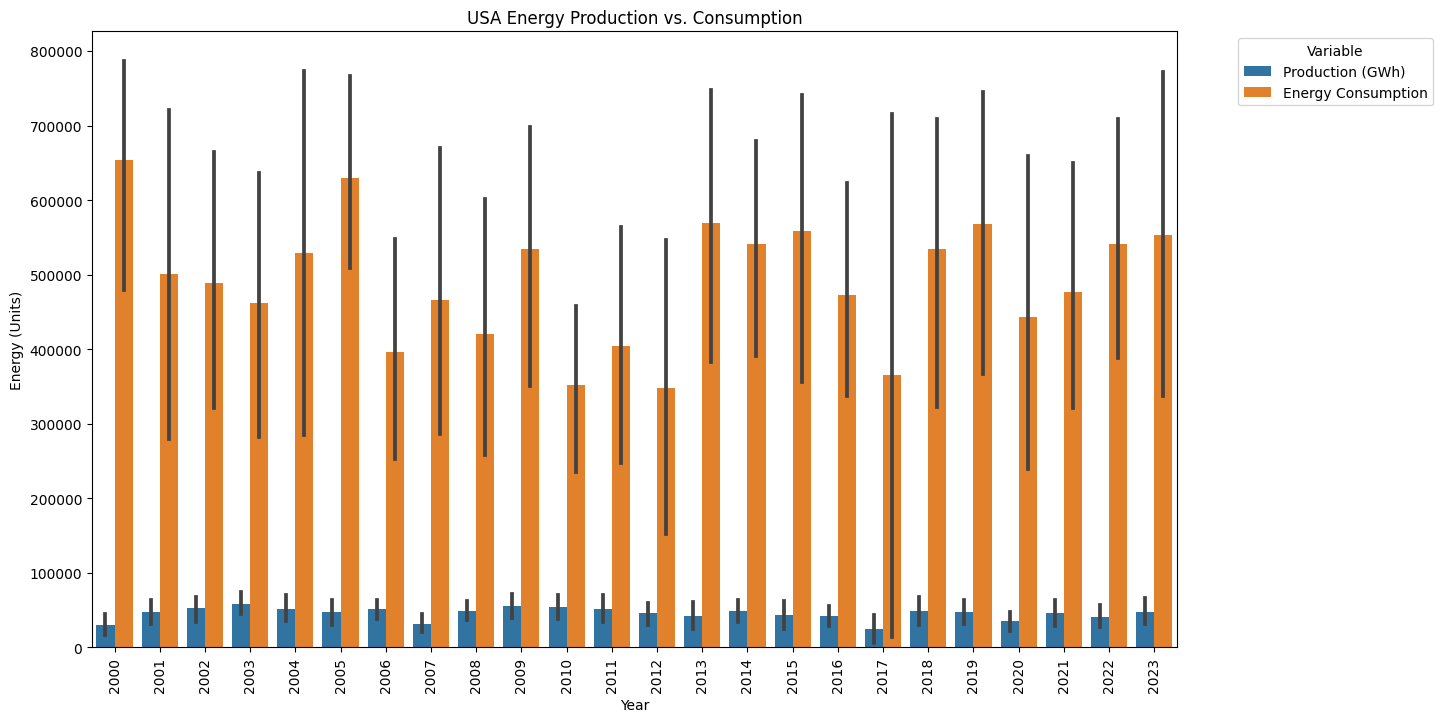

In [14]:
# convert the dataframe to a long format
df_USA_melted = pd.melt(df_USA, id_vars='Year', value_vars=['Production (GWh)', 'Energy Consumption'],var_name='Variable', value_name='Value') 

plt.figure(figsize=(14, 8))
sns.barplot(data=df_USA_melted, x='Year', y='Value', hue='Variable')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Energy (Units)')
plt.title('USA Energy Production vs. Consumption')
plt.legend(title='Variable', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

How is consumption >> production? What does the "Proportion of Energy from Renewables" column mean? Does consumption include energy from nonrenewables?

Scatterplot of Investments vs Production

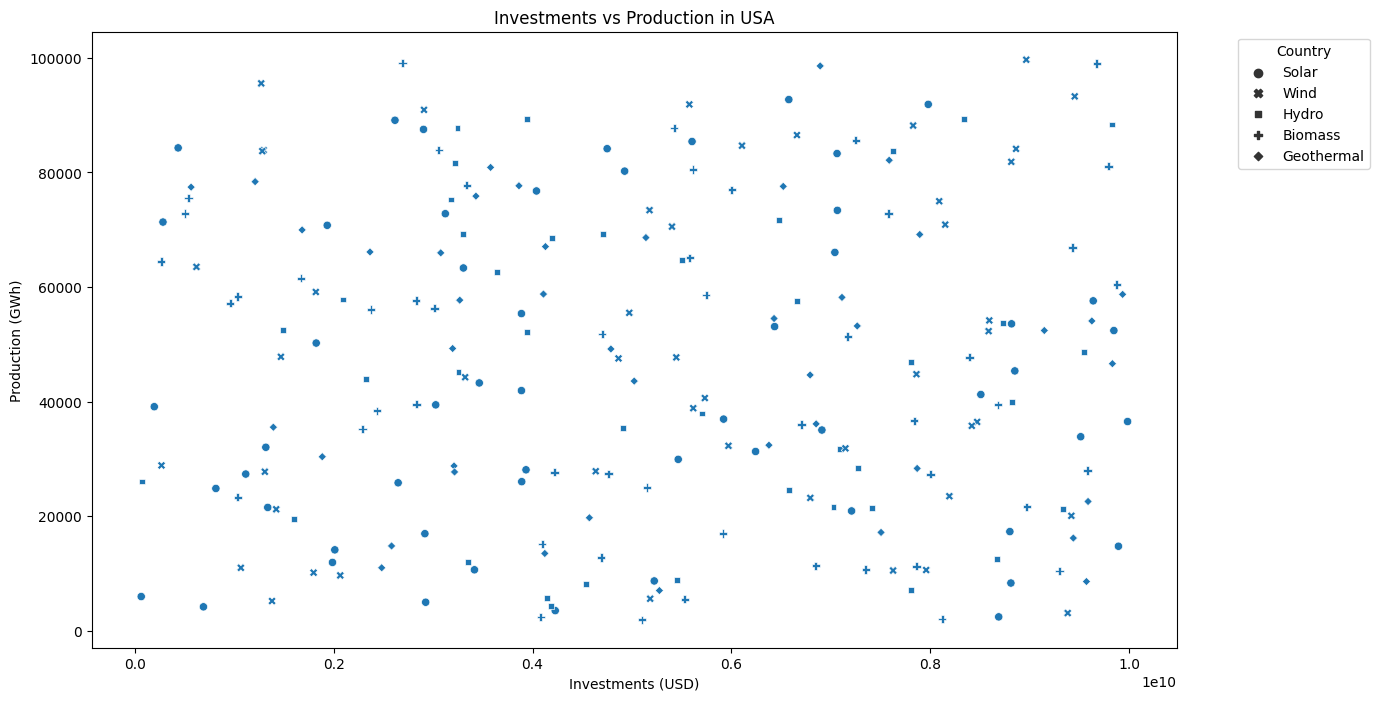

In [15]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_USA, x='Investments (USD)', y='Production (GWh)', style='Energy Type')
plt.title('Investments vs Production in USA')
plt.xlabel('Investments (USD)')
plt.ylabel('Production (GWh)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
#plt.figure(figsize=(14, 8))
#sns.regplot(data=df_USA.loc[df_USA['Energy Type']== 'Solar'], x='Investments (USD)', y='Production (GWh)', ci=None)
#plt.title('Solar Energy Investments vs Production in USA')
#plt.xlabel('Investments (USD)')
#plt.ylabel('Production (GWh)')
#plt.show()


Scatter plots of the variables 'Production (GWh)', 'Investments (USD)', 'R&D Expenditure', 'Energy Sector Workforce' 

In [17]:
df1_USA = df_USA.loc[:, ['Production (GWh)', 'Investments (USD)', 'R&D Expenditure', 'Energy Sector Workforce' ]]
df1_USA.head(10)

,Production (GWh),Investments (USD),R&D Expenditure,Energy Sector Workforce
0,85404.690027,5.604125e+09,8.676561e+09,511658
31,55487.022414,4.972808e+09,6.633566e+09,442797
39,21195.906636,9.333387e+09,8.068504e+09,569529
52,10964.768790,1.066271e+09,8.760259e+09,81664
57,71690.955005,6.479176e+09,5.102718e+09,294639
91,2016.882560,8.121393e+09,1.241189e+09,159733
92,33851.850303,9.513058e+09,4.661780e+09,451849
134,80231.395282,4.926187e+09,7.010735e+09,412227
143,21469.448391,7.412587e+09,2.494097e+09,149308
156,89112.981992,2.616267e+09,3.065755e+09,498123


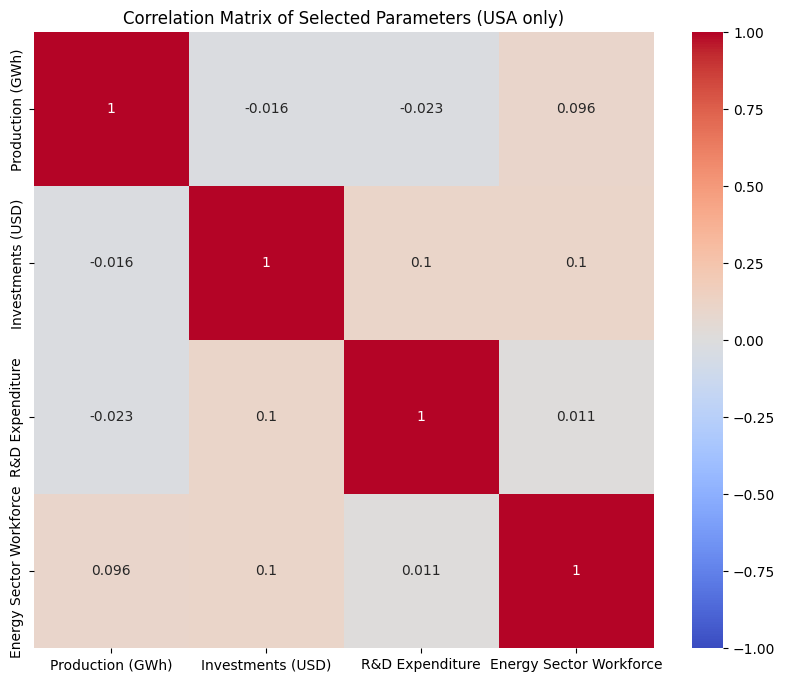

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

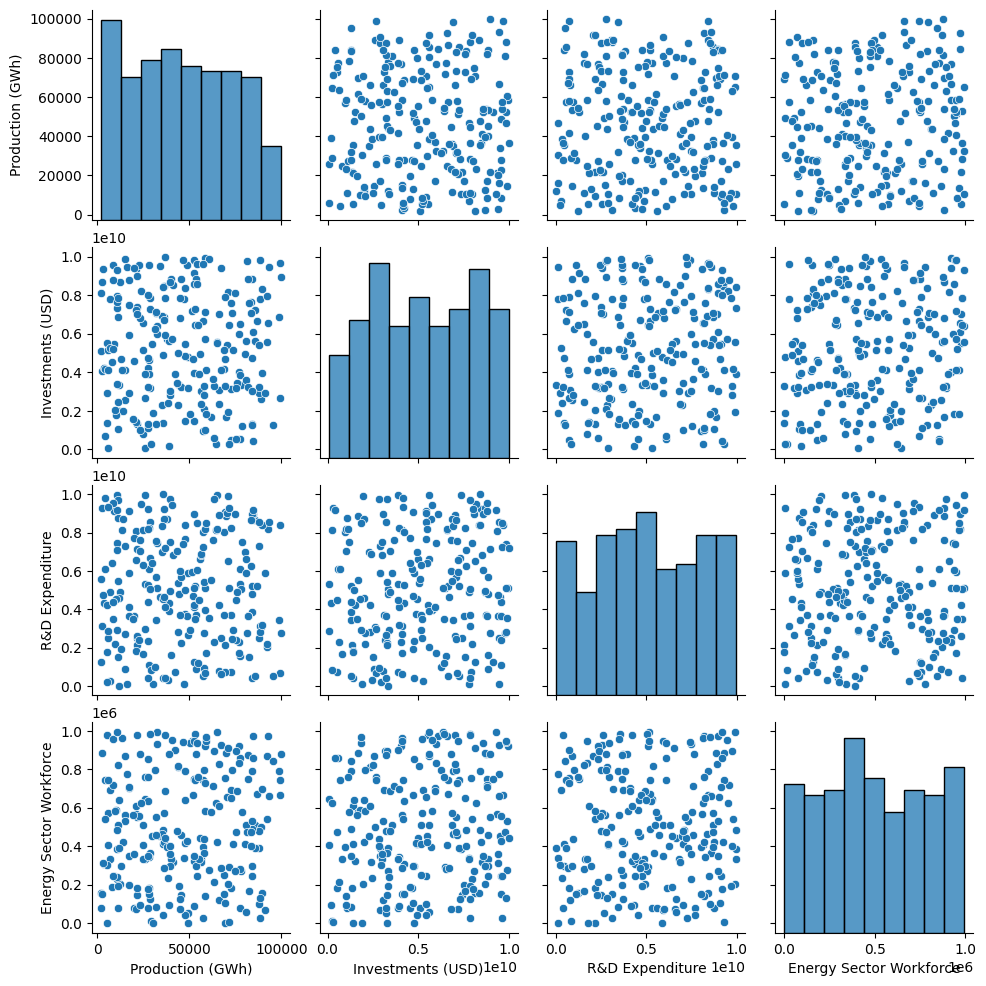

In [18]:
# Calculate correlation matrix
correlation_matrix = df1_USA.corr()
#print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Parameters (USA only)')
plt.show()

# Pair plot
sns.pairplot(df1_USA)
plt.show()

# Conduct a principal component analysis (PCA)

Normalize the data.

Exclude Country, Energy Type, Year columns and all boolean columns   
boolean_columns = ['Government Policies', 
                   'Energy Market Liberalization',
                   'Technology Transfer Agreements',
                   'Renewable Energy Education Programs',
                   'Natural Disasters',
                   'Public-Private Partnerships in Energy',
                   'Regional Renewable Energy Cooperation']

In [19]:
from sklearn.preprocessing import StandardScaler

#features = ['Production (GWh)', 'Installed Capacity (MW)', 'Investments (USD)', 
#           'R&D Expenditure', 'Energy Sector Workforce', ...]  # Add all relevant features
df1_USA = df_USA.drop(['Country', 
                        'Energy Type', 
                        'Year','Government Policies', 
                       'Energy Market Liberalization',
                       'Technology Transfer Agreements',
                       'Renewable Energy Education Programs',
                       'Natural Disasters',
                       'Public-Private Partnerships in Energy',
                       'Regional Renewable Energy Cooperation'], axis=1)
features = df1_USA.columns.tolist()


x = df1_USA[features].values       #x is a numpy array
#x = df_USA.drop(['Country', 'Energy Type', 'Year'], axis=1).values

#Normalize data
x_scaled = StandardScaler().fit_transform(x)

Here, check transformation i.e x_scaled and df1_USA should be proportional? Plot a few corresponding scatter plots

In [20]:
df1_USA.head(10)

,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,Renewable Energy Jobs,...,Rule of Law,Control of Corruption,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables
0,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,13413.184740,294399.377891,756878,...,2.207195,6.339640,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895
31,55487.022414,13187.616682,4.972808e+09,710170825,1.160719e+14,985035.710103,48007.275199,40046.292023,684123.841059,521931,...,6.591428,8.592916,73.190026,27.681272,60.332998,220,95,9622,442797,57.057514
39,21195.906636,34520.490610,9.333387e+09,51710882,2.802626e+13,82210.082536,49193.291240,98780.533860,379652.244525,615749,...,9.656121,4.935988,85.752072,22.331396,83.063427,943,26,2979,569529,3.682494
52,10964.768790,18139.559117,1.066271e+09,1292204876,1.846752e+13,267626.780686,64471.760741,61961.860944,988439.475270,104091,...,4.684877,3.592014,94.428391,73.100577,61.907810,221,54,9303,81664,44.765644
57,71690.955005,45631.258916,6.479176e+09,643635950,6.848907e+12,564800.075362,55904.692161,79899.071894,310901.429800,450978,...,3.527254,1.886220,91.894775,5.908946,10.367295,177,55,2382,294639,27.354661
91,2016.882560,1409.725298,8.121393e+09,196283776,8.068881e+13,575817.545398,73126.760275,51586.219316,593925.978074,6378,...,3.405500,7.624446,53.254121,28.939770,86.133834,42,3,8813,159733,8.329128
92,33851.850303,27673.258461,9.513058e+09,7940294,1.767641e+14,763942.895313,49028.204085,85068.635657,48682.142797,56376,...,7.098561,3.178301,39.866682,73.880139,67.659440,40,75,5709,451849,68.740601
134,80231.395282,18019.469070,4.926187e+09,662628516,1.893437e+14,377298.993349,36604.480175,21759.468398,690355.743677,976546,...,1.217089,3.633308,11.157439,38.901766,30.807881,763,35,6975,412227,38.893845
143,21469.448391,1021.144123,7.412587e+09,415231934,1.056999e+14,690484.263418,47541.662027,68839.809287,9632.213062,298602,...,0.742381,8.637516,73.113694,50.812730,50.935538,159,25,4907,149308,98.611484
156,89112.981992,43304.796800,2.616267e+09,1112686632,1.197760e+14,232802.150004,48959.205972,71329.076662,936800.108529,432256,...,1.800470,7.706474,22.195256,43.657977,58.780568,162,51,9978,498123,8.083664


In [21]:
#type(x_scaled)
x_scaled.shape   #(253,46)

(235, 46)

Text(0, 0.5, 'Production (scaled)')

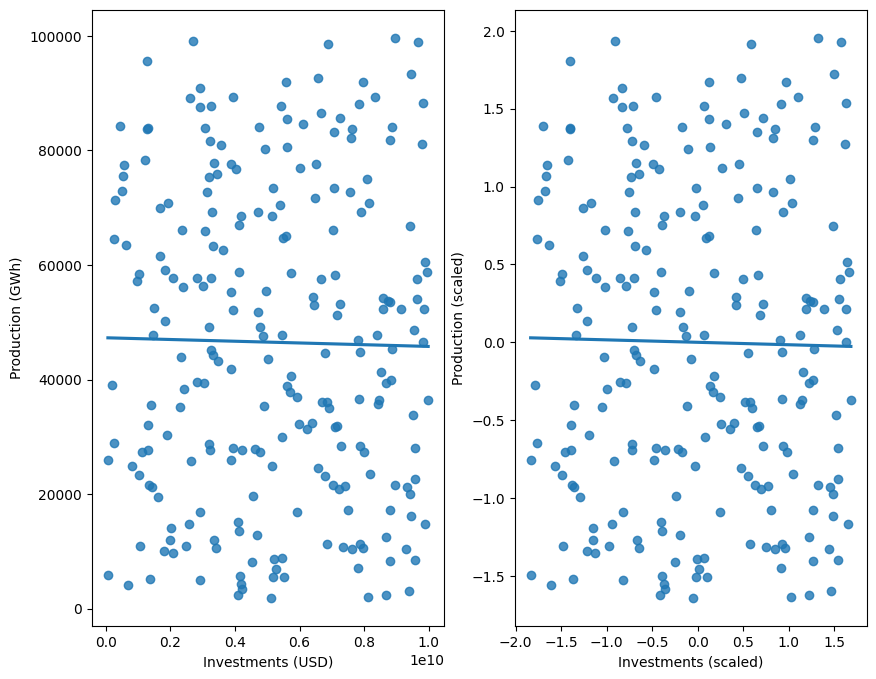

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

sns.regplot(data=df1_USA, x='Investments (USD)', y='Production (GWh)', ci=None, ax=ax[0])
sns.regplot(x= x_scaled[:,2], y=x_scaled[:,0], ci=None, ax=ax[1])

ax[1].set_xlabel('Investments (scaled)')
ax[1].set_ylabel('Production (scaled)')

Text(0, 0.5, 'Production (scaled)')

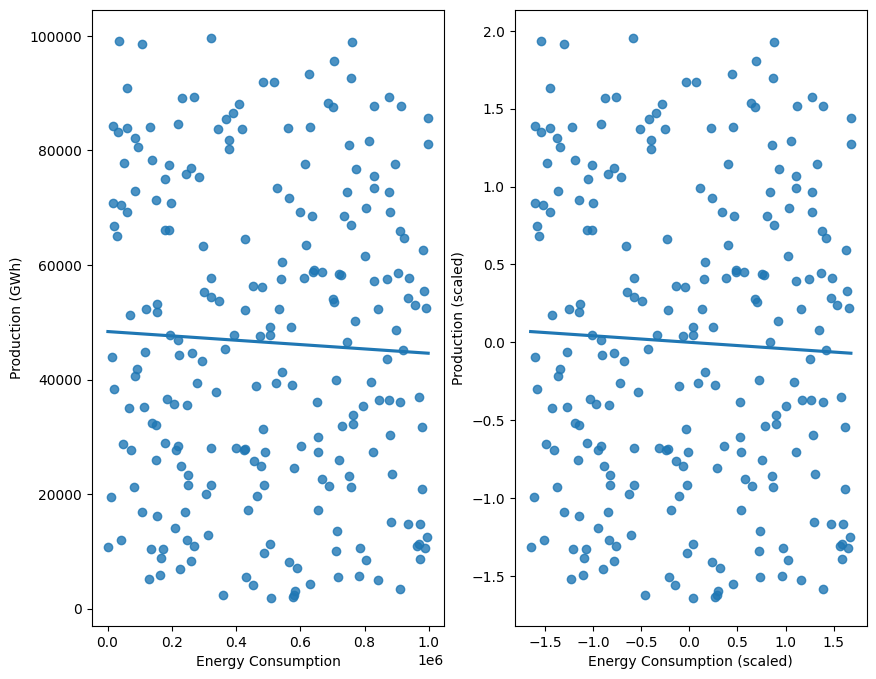

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

sns.regplot(data=df1_USA, x='Energy Consumption', y='Production (GWh)', ci=None, ax=ax[0])
sns.regplot(x= x_scaled[:,5], y=x_scaled[:,0], ci=None, ax=ax[1])

ax[1].set_xlabel('Energy Consumption (scaled)')
ax[1].set_ylabel('Production (scaled)')

Perform PCA.

Theoretically, the PCi's are best lines through the origin that best fit the shifted and normalized data. The best fit is selected as follows:

A random line through the origin.    
Data points are all projected to this line.   
The square distances between projected points and the origin is calculated. The sum of square distances (SS's) is recorded.   
Random line is rotated and the process is repeated a set number of times.   
PC1 is the line that maximizes the SS.   
   
To get PC2, a random line through the origin that is perpendicular to PC1 is chosen and the SS is measured as before.    
The random line is rotated (still perp to PC1) and the process is repeated a set number of times.     
PC2 is the line that maximizes the SS's.   

.   
.   
.   
    
PCn is determined by the previous PC(n-1)    
    
The eigenvalue for each PCi is the average of the SS distances for PCi. It is also the variation for PCi.


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(features))  # Start with as many components as features
principal_components = pca.fit_transform(x_scaled)
#principal_components = pca.transform(x_scaled)

In [25]:
principal_df = pd.DataFrame(data=principal_components, 
                            columns=[f'PC{i+1}' for i in range(len(features))])

# theoretically each PCi is the best fitted line (through the origin) - this line is fit by
# maxizing the sum of squared distances of projected data points to the origin 
# (data points are all projected to a line and distances measured)
# such that the sum of squared distances of each projected point to the origin is maximized
# according to PCA with SVD

#The average of the square distances for each projected point of a given PC (best fitted line), is an eigenvalue for that PC. It is also the variance for PC1?

#each PCi is a linear combination of all the variables

In [26]:
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
0,3.350381,1.044833,-0.274989,-0.415528,0.155722,0.796626,-1.196248,-0.060176,-0.737342,-0.032906,...,0.076231,0.507879,0.343821,0.859029,-0.251451,-0.903912,-0.822764,-0.070632,-0.331346,-0.126951
1,-2.164678,-0.113494,-0.267749,0.363508,-2.178226,1.751393,0.202348,-1.147963,1.219580,-0.659905,...,-0.778367,-0.322828,-1.109647,0.129787,-0.202140,1.611765,-0.176613,0.826639,0.051890,0.316436
2,1.115863,-0.998695,-0.663724,1.230959,3.687865,-0.142599,-0.781777,0.661291,2.840125,-2.521545,...,0.052561,0.777394,0.226410,0.506971,1.289658,-0.548954,0.400220,-0.446942,1.124481,0.097030
3,2.152368,-0.107849,-0.053461,1.987482,-2.075725,-0.655858,0.371232,0.730515,0.072152,0.163547,...,-1.030027,0.520439,0.081343,-0.380146,0.129676,-1.401000,0.284337,-0.118171,0.253150,0.660471
4,0.187638,0.675066,0.701153,0.960262,1.883530,-0.893755,1.870784,-0.484226,0.243804,0.080815,...,-0.470648,-0.394937,-0.916468,0.467038,0.306620,-0.080423,-1.241047,-0.235270,-0.470741,-0.840317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.064694,-2.222036,-1.450325,1.674077,1.620498,0.622712,-2.150787,-1.040476,-0.836093,-0.849744,...,-0.589100,0.261672,-0.525593,0.972245,-0.448494,0.300747,-0.049051,-0.737875,-0.340202,0.470306
231,1.335507,1.002356,-1.692566,-1.027811,-0.259592,0.176613,-1.513157,0.945993,2.695723,0.311188,...,0.167437,1.312887,-1.074567,0.140665,0.223744,-0.972793,0.100110,0.202208,-0.169374,0.647618
232,0.027598,1.760711,-1.247142,-0.210320,-1.219255,0.709685,0.387033,-0.957033,-1.137425,1.199193,...,-1.687318,0.257068,-0.800985,0.279004,-1.943710,0.235203,-0.121156,-0.830469,-0.715751,0.754435
233,-1.084823,-0.314169,-0.708439,0.228138,-0.069023,-0.114030,-0.248193,2.093269,-0.243214,-0.071841,...,-0.392623,-0.670742,-0.548928,-0.235019,0.595942,-0.231150,0.342680,-0.692665,-0.701310,1.035157


principal_df is the transformed data in the principal component space

In [27]:
pca.components_
# gives the loadinds - i.e. the square root of eigenvalues =  standard deviation

array([[ 0.12140775, -0.26095308, -0.22466186, ...,  0.16099511,
         0.04796218, -0.16202461],
       [ 0.26981069, -0.05454692,  0.11440204, ..., -0.09416923,
        -0.11487851, -0.08768137],
       [ 0.20061811,  0.02965612, -0.07036753, ...,  0.30427908,
         0.03376425, -0.09738781],
       ...,
       [ 0.00426676,  0.19128251,  0.07095649, ..., -0.0169971 ,
        -0.04373836,  0.23789342],
       [ 0.15898144, -0.22056464,  0.1014729 , ..., -0.1711588 ,
        -0.27388597,  0.09618374],
       [-0.04020517, -0.02651876, -0.01394254, ...,  0.31165858,
        -0.16989043,  0.07037339]])

In [28]:
pca.explained_variance_

array([1.92584275, 1.88291552, 1.86214579, 1.69037238, 1.6605093 ,
       1.64240959, 1.58093192, 1.52421446, 1.45510213, 1.41612393,
       1.32442525, 1.30750247, 1.25678394, 1.24897502, 1.20559985,
       1.18090133, 1.13476362, 1.09778594, 1.07050579, 1.02909642,
       1.00211097, 0.97374632, 0.93870221, 0.92026399, 0.90833621,
       0.85020031, 0.84481144, 0.81327021, 0.8021302 , 0.77171582,
       0.74774352, 0.73306462, 0.67839239, 0.66153741, 0.6434724 ,
       0.61209268, 0.59521678, 0.57838985, 0.55516687, 0.51766791,
       0.48166772, 0.45993804, 0.42470548, 0.41074343, 0.40605406,
       0.36853294])

In [29]:
#fig, ax = plt.subplots(1,2, figsize=(10,8))

#sns.scatterplot(data=df1_USA, x='Investments (USD)', y='Production (GWh)', ax=ax[0])
#sns.scatterplot(data=principal_df, x='PC3', y='PC1', ax=ax[1])

#ax[1].set_xlabel('Investments (scaled)')
#ax[1].set_ylabel('Production (scaled)')

In [30]:
#fig, ax = plt.subplots(1,2, figsize=(10,8))

#sns.scatterplot(data=df1_USA, x='Energy Consumption', y='Production (GWh)', ax=ax[0])
#sns.scatterplot(data=principal_df, x='PC6', y='PC1', ax=ax[1])


In [31]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.04168799 0.04075876 0.04030917 0.03659085 0.03594442 0.03555262
 0.03422184 0.0329941  0.03149805 0.0306543  0.02866933 0.02830301
 0.02720513 0.02703609 0.02609717 0.02556253 0.0245638  0.02376336
 0.02317284 0.02227646 0.02169232 0.02107832 0.02031973 0.01992061
 0.01966241 0.01840397 0.01828732 0.01760455 0.01736341 0.01670504
 0.01618612 0.01586837 0.0146849  0.01432005 0.013929   0.01324974
 0.01288443 0.01252019 0.01201749 0.01120576 0.01042648 0.00995611
 0.00919344 0.00889121 0.0087897  0.00797749]


In [32]:
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.04168799 0.08244676 0.12275593 0.15934678 0.1952912  0.23084382
 0.26506566 0.29805976 0.3295578  0.36021211 0.38888144 0.41718445
 0.44438958 0.47142567 0.49752284 0.52308537 0.54764917 0.57141253
 0.59458536 0.61686183 0.63855414 0.65963246 0.6799522  0.69987281
 0.71953522 0.73793918 0.7562265  0.77383105 0.79119446 0.8078995
 0.82408563 0.839954   0.85463891 0.86895896 0.88288796 0.8961377
 0.90902214 0.92154232 0.93355981 0.94476557 0.95519205 0.96514816
 0.9743416  0.98323281 0.99202251 1.        ]


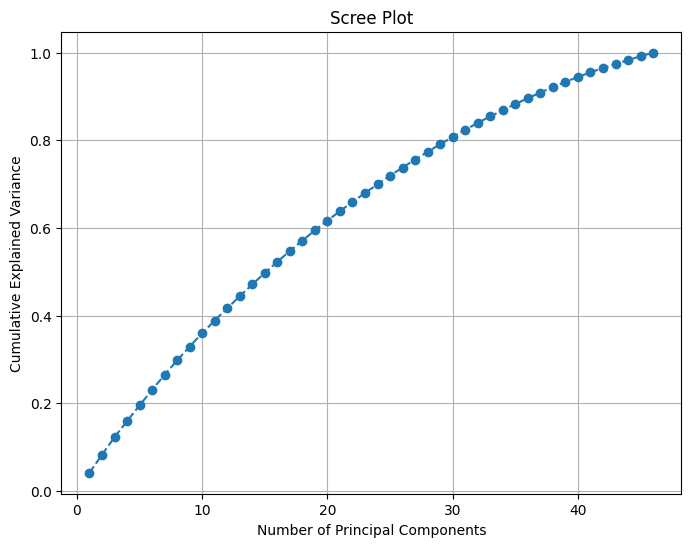

In [33]:

plt.figure(figsize=(8,6))
plt.plot(range(1, len(features) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

No principal component is significantly different than the others. That is all components account for small portion of variation.

In [34]:
#fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(20, 10))
#axes = axes.flatten()  # Flatten the 2D array of axes

#Plot for each energy type
#for i, energy_type in enumerate(energy_order):
#    ax = axes[i]
#   sns.regplot(data=df_USA.loc[df_USA['Energy Type']== energy_type], x='Investments (USD)', y='Production (GWh)', ci=None, ax=ax)
#   ax.set_title(f'{energy_type} Energy Investments vs Production in USA')
#   ax.set_xlabel('Investments (USD)')
#    ax.set_ylabel('Production (GWh)')
    

# Hide any unused subplots
#for j in range(i + 1, len(axes)):
#    fig.delaxes(axes[j])

#plt.tight_layout()
#plt.show()    
